In [1]:
%pylab inline
import imageio as im

Populating the interactive namespace from numpy and matplotlib


In [2]:
imagen = im.imread("class5_images/galaxy_image2.png")

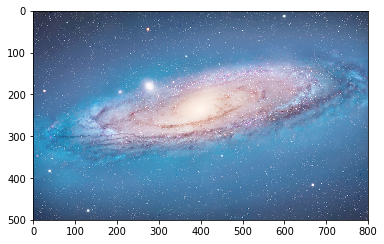

In [3]:
imshow(imagen)

In [4]:
imagen.shape

(500, 800, 3)

In [5]:
for i in range(imagen.shape[0]):
    for j in range(imagen.shape[1]):
        rgb = imagen[i,j,:]
        imagen[i,j,:] = mean(rgb)

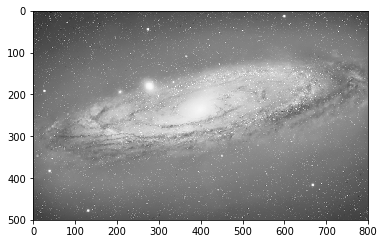

In [6]:
imshow(imagen)

In [112]:
imagen_original = im.imread("class5_images/galaxy_image2.png")
imagen = imagen_original.copy()

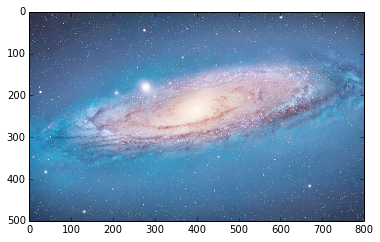

In [113]:
imshow(imagen_original)

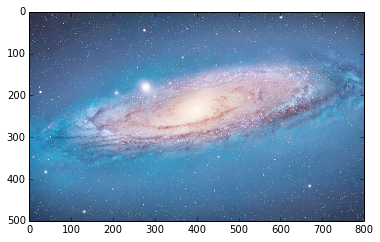

In [114]:
imshow(imagen)

In [115]:
def procesar_imagen(i1,i2,j1,j2):
    for i in range(i1,i2):
        for j in range(j1,j2):
            rgb = imagen[i,j,:]
            imagen[i,j,:] = mean(rgb)

In [116]:
imagen.shape

(500, 800, 3)

In [117]:
procesar_imagen(0,250,0,400)

CPU times: user 8.05 s, sys: 8.41 ms, total: 8.05 s
Wall time: 8.04 s


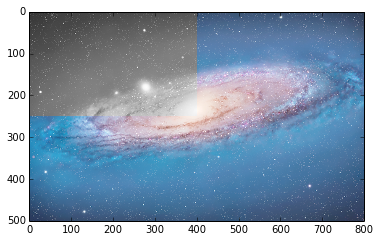

In [108]:
imshow(imagen)

In [119]:
imagen = imagen_original.copy()

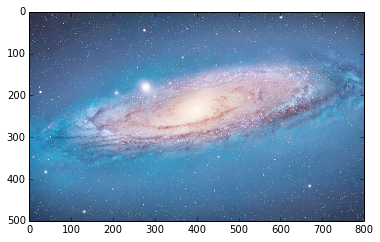

In [120]:
imshow(imagen)

In [4]:
import threading

In [111]:
## Creamos los hilos o "threads", cada uno trabaja en una parte distinta de la imágen.
t1 = threading.Thread(target=procesar_imagen, args=(0,250,0,400))
t2 = threading.Thread(target=procesar_imagen, args=(0,250,400,800))
t3 = threading.Thread(target=procesar_imagen, args=(250,500,0,400))
t4 = threading.Thread(target=procesar_imagen, args=(250,500,400,800))
    
## Los hilos comienzan su trabajo...
t1.start()
t2.start()
t3.start()
t4.start()

## Esperamos hasta que todos los hilos hayan completado su trabajo...
t1.join()
t2.join()
t3.join()
t4.join()

CPU times: user 49.7 s, sys: 4.28 s, total: 54 s
Wall time: 47.3 s


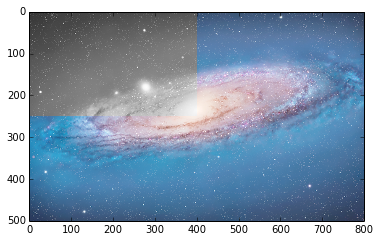

In [118]:
imshow(imagen)

# Multithreading

* Esta tarea es muy apto para *multithreading*: los threads en un proceso no comunican. Son "trabajadores" independientes.
* Pero, todos los threads ven el mismo bloque de memoria, donde tenemos los datos de la imágen.
* En esta tarea, el trabajo de cada thread es totalmente indepdendiente de los otros.

No todos los algoritmos son tan fácil de paralelizar para procesamiento multithread.

### Multithreading en Python

* El ejemplo que tenemos aquí, de hecho, es algo que Python hace muy mal!
* Por razones que tiene que ver con el diseño del lenguaje, Python no hace *multithreading* de verdad!
* Su módulo "threading" es útil en un programa que busca datos del Internet, o que lee/escribe mucho en el disco duro. Pero no funciona bien para la paralelización de cálculos númericos...